<a href="https://colab.research.google.com/github/nakthecoder/Online-Courses-Learning/blob/master/bus118/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Generate sample data
data = {
'square_footage': [1500, 2000, 1800, 2500, 2200, 1700, 3000, 1900, 2100, 2600],
'location': ['Downtown', 'Suburb', 'Downtown', 'Rural', 'Suburb', 'Downtown',
'Rural', 'Suburb', 'Downtown', 'Rural'],
'price': [300000, 350000, 320000, 280000, 360000, 310000, 400000, 340000,
330000, 290000]
}
df = pd.DataFrame(data)
# Features and target
X = df[['square_footage', 'location']]
y = df['price']
# Preprocessing: One-hot encode the location column
preprocessor = ColumnTransformer(
transformers=[
('location', OneHotEncoder(sparse_output=False), ['location'])
], remainder='passthrough')
# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=62)
# Train model
model.fit(X_train, y_train)
# Make prediction for a new house: 2000 sq ft in Downtown
new_house = pd.DataFrame({'square_footage': [2000], 'location': ['Downtown']})
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sq ft house in Downtown: ${predicted_price[0]:,.2f}")
# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['location']
.get_feature_names_out(['location'])).tolist() + \
['square_footage']
coefficients = model.named_steps['regressor'].coef_
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Predicted price for a 2000 sq ft house in Downtown: $342,733.81

Model Coefficients:
location_Downtown: 42653.88
location_Rural: -96099.12
location_Suburb: 53445.24
square_footage: 170.50


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Generate sample customer data
data = {
'age': [28, 44, 55, 58, 52, 56, 45, 59, 45, 53],
'monthly_usage_hours': [50, 50, 20, 55, 60, 30, 55, 52, 55, 40],
'purchase_amount': [500, 250, 150, 800, 300, 200, 175, 90, 280, 220],
'customer_service_calls': [5, 2, 8, 6, 5, 3, 7, 4, 4, 2],
'region': ['North', 'South', 'West', 'East', 'South', 'North', 'West', 'East',
'South', 'North'],
'churn': [1, 0, 1, 1, 1, 0, 1, 1, 1, 1] # 1 = churned, 0 = not churned
}
df = pd.DataFrame(data)
# Features and target
X = df[['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls',
'region']]
y = df['churn']
# Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
transformers=[
('num', StandardScaler(), ['age', 'monthly_usage_hours', 'purchase_amount',
'customer_service_calls']),
('cat', OneHotEncoder(sparse_output=False), ['region'])
])
# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', LogisticRegression(random_state=42))
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Train model
model.fit(X_train, y_train)
# Predict churn probability for a new customer
new_customer = pd.DataFrame({
'age': [40],
'monthly_usage_hours': [200],
'purchase_amount': [800],
'customer_service_calls': [20],
'region': ['West']
})
churn_probability = model.predict_proba(new_customer)[0][1] # Probability of churn (class 1)
# Classify based on threshold (0.5)
threshold = 0.5
churn_prediction = 1 if churn_probability > threshold else 0
print(f"Churn Probability for new customer: {churn_probability:.2f}")
print(f"Churn Prediction (1 = churn, 0 = no churn): {churn_prediction}")
# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['cat']
.get_feature_names_out(['region'])).tolist() + ['age',
'monthly_usage_hours', 'purchase_amount', 'customer_service_calls']
coefficients = model.named_steps['classifier'].coef_[0]
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Churn Probability for new customer: 1.00
Churn Prediction (1 = churn, 0 = no churn): 1

Model Coefficients:
region_East: -0.26
region_North: 0.58
region_South: 0.13
region_West: 0.46
age: 0.13
monthly_usage_hours: -0.33
purchase_amount: 0.05
customer_service_calls: 0.15


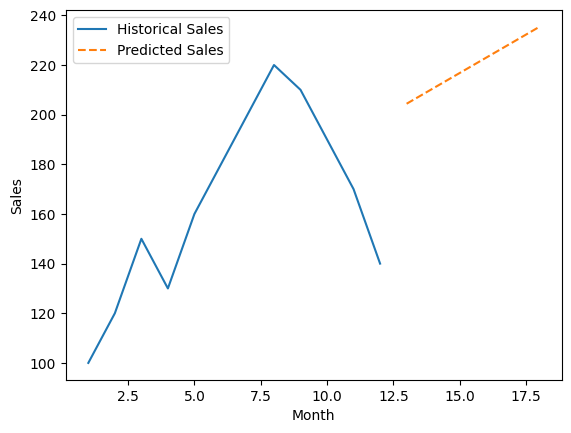

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sales_data.csv')  # Ensure columns: 'month', 'sales'
X = df[['month']]
y = df['sales']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for next 6 months
future_months = pd.DataFrame({'month': range(max(df['month'])+1, max(df['month'])+7)})
predictions = model.predict(future_months)

# Plot results
plt.plot(df['month'], y, label='Historical Sales')
plt.plot(future_months['month'], predictions, label='Predicted Sales', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
# Create a dummy sales data file
data = {'month': range(1, 13),
        'sales': [100, 120, 150, 130, 160, 180, 200, 220, 210, 190, 170, 140]}
dummy_df = pd.DataFrame(data)
dummy_df.to_csv('sales_data.csv', index=False)
print("Dummy 'sales_data.csv' created.")

Dummy 'sales_data.csv' created.
